In [3]:
import pandas as pd
import numpy as np
from dfply import *
from datetime import *
import matplotlib.pyplot as plt

In [4]:
@make_symbolic
def datetime_old(series):
    series=series.apply(lambda x:"2013/"+x[1:] if x.split()[-1].split(":")[0]!="24" else "2013/"+x.split()[0]+" 00:00:00")
    return series.apply(lambda x:datetime.strptime(x, '%Y/%m/%d  %H:%M:%S'))

@make_symbolic
def datetime_newapp(series):
    return series.apply(lambda x:datetime.strptime(x, '%m/%d/%Y %H:%M').replace(minute=0))

df_new = pd.read_csv('/Users/guwu/Desktop/nov2020_homework-main/data/Assignment 2 - new.app4.csv')
df_old = pd.read_csv('/Users/guwu/Desktop/nov2020_homework-main/data/Assignment 2 - USA_AL_Auburn-Opelika.AP.722284_TMY3_BASE.csv')

df_merged=(df_old>>rename(time="Date/Time")>> mutate(time=datetime_old(X.time))>> left_join((df_new>>transmute(Electricity_newapp=X.W_min/60000,
       time=datetime_newapp(X.time))>> 
 group_by(X.time)>>
 summarize(Electricity_app=X.Electricity_newapp.sum())
),by='time')
          >>
          mutate(total_Electricity=X.sum(axis=1))
         )

df_merged

,time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_app,total_Electricity
0,2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,11.035430
1,2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,11.496637
2,2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,11.757447
3,2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,11.885034
4,2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,12.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.230105
8756,2013-12-31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.920653
8757,2013-12-31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.441100
8758,2013-12-31 23:00:00,1.769166,0.295330,0.0,0.256420,0.0,0.006642,0.006642,0.006642,0.424881,0.091531,0.234174,0.564895,0.430399,NaN,4.086723


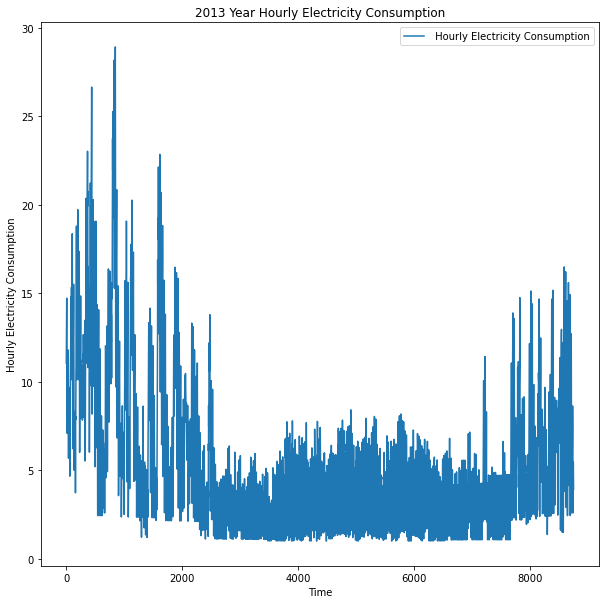

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(df_merged.loc[:,"total_Electricity"],label=" Hourly Electricity Consumption")
ax.set(title="2013 Year Hourly Electricity Consumption",
xlabel="Time",
ylabel="Hourly Electricity Consumption")
plt.legend(loc="upper right")
plt.show()

<AxesSubplot:xlabel='time'>

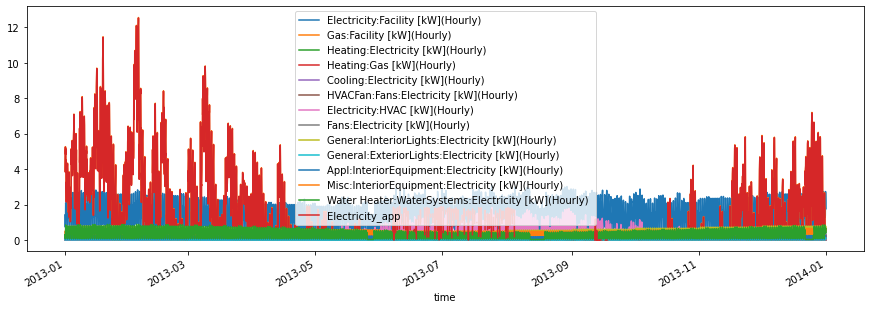

In [6]:
merged = df_merged.copy().set_index("time")
fig, ax = plt.subplots(figsize=(15,5))
merged.iloc[:,:-1].plot(ax=ax)


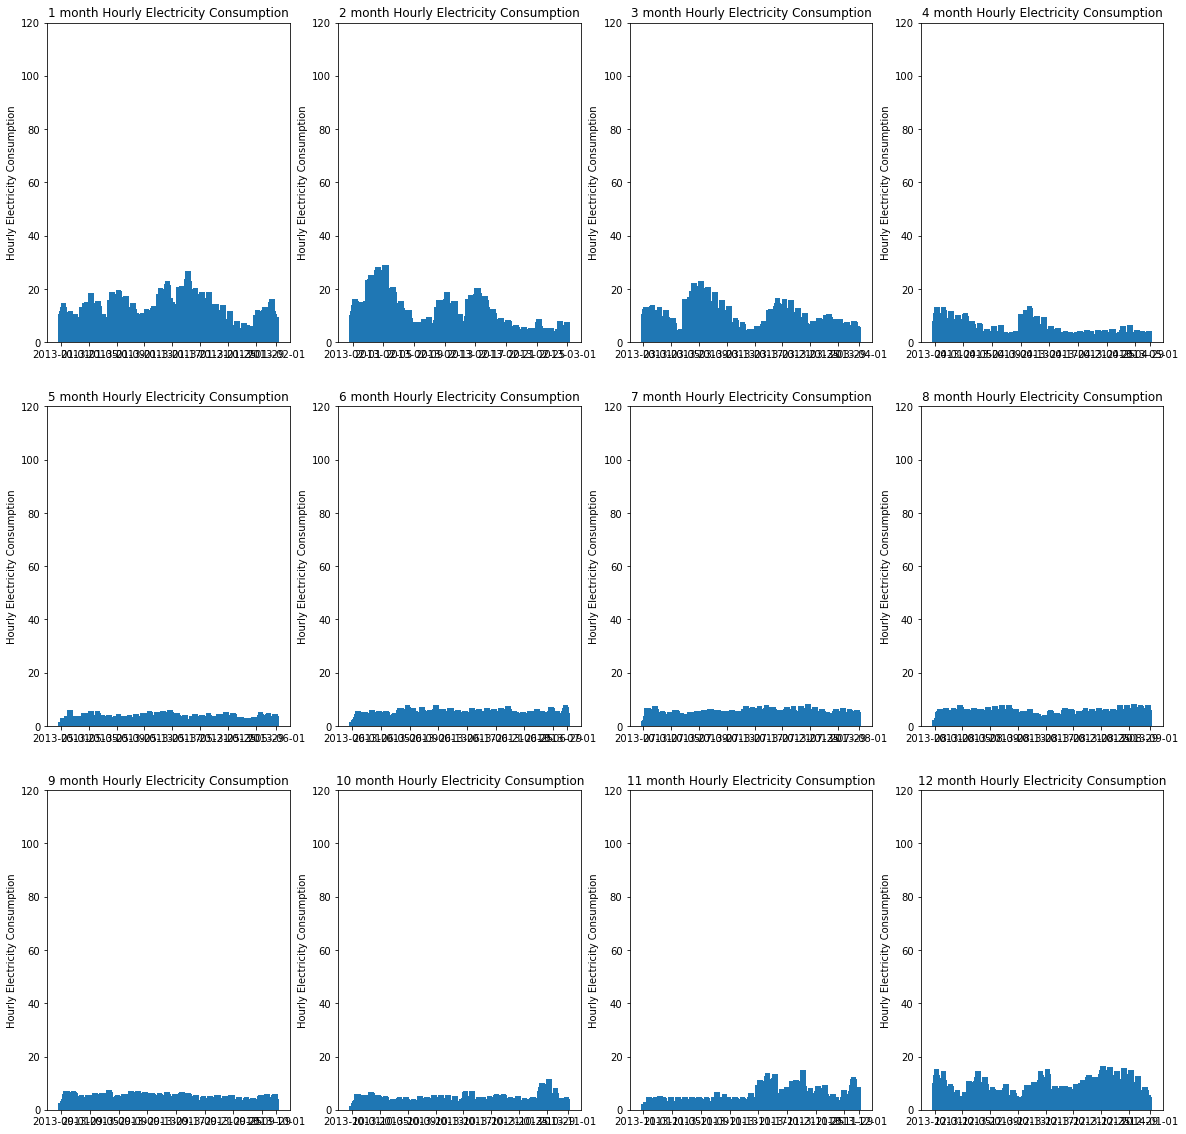

In [12]:
fig = plt.figure(figsize=(20,20))
for month in range(1,13):
    ax = fig.add_subplot(3,4,month)
    mask=merged.index.month==month
    ax.set(title="{} month Hourly Electricity Consumption".format(month),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(merged.loc[mask,"total_Electricity"].index,height=merged.loc[mask,"total_Electricity"],label="{}".format(month))
    

In [8]:
merged1=merged.copy()
merged1=merged1.groupby(merged1.index.month).sum()
merged1

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_app,total_Electricity
time,,,,,,,,,,,,,,,
1,1176.792528,2777.487816,0.0,2754.349606,0.000000,69.730702,69.730702,69.730702,199.737627,43.028790,182.773922,335.924276,331.819077,0.000000,8011.105746
2,1025.297059,2056.145785,0.0,2035.138190,0.000000,51.397283,51.397283,51.397283,157.623694,33.956329,164.939671,304.991659,299.943655,0.000000,6232.227893
3,1036.168230,1884.488682,0.0,1864.195170,0.000000,47.407780,47.407780,47.407780,147.343889,31.741786,187.695084,294.624495,313.577061,0.000000,5902.057735
4,915.411861,514.266298,0.0,494.666189,5.111611,14.163565,19.275176,14.163565,116.621089,25.123281,182.959876,284.557556,273.541203,0.000000,2859.861270
5,898.332911,74.046297,0.0,53.752784,48.566114,15.970631,64.536746,15.970631,104.406748,22.491985,177.077982,294.624495,221.416819,0.000000,1991.194146
6,1085.472084,17.234913,0.0,0.000000,253.690297,75.035485,328.725782,75.035485,94.042906,20.259339,178.119412,250.219255,200.771709,73.540087,2652.146753
7,1161.527418,17.729278,0.0,0.000000,304.599754,90.743780,395.343533,90.743780,99.669871,21.471537,185.477440,257.396523,188.390378,100.418757,2913.512047
8,1151.485765,17.729278,0.0,0.000000,334.867249,98.323485,433.190733,98.323485,111.587517,24.038914,161.141285,257.396523,150.352658,16.779104,2855.215995
9,1075.703537,17.234913,0.0,0.000000,212.274243,64.033350,276.307593,64.033350,130.080539,28.022801,178.775036,250.219255,198.964632,4.539750,2500.189000


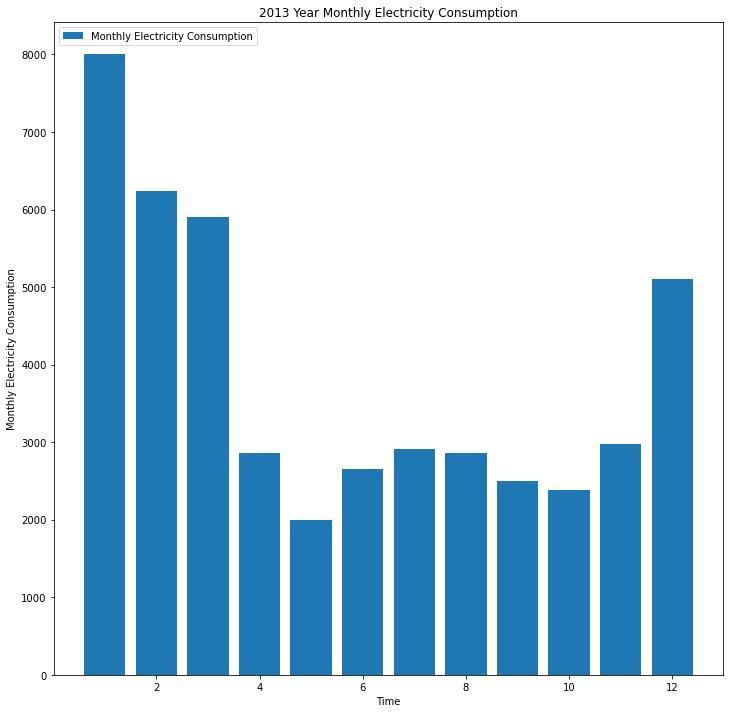

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.bar(merged1.index,height=merged1.total_Electricity,label="Monthly Electricity Consumption")
ax.set(title="2013 Year Monthly Electricity Consumption",
xlabel="Time",
ylabel="Monthly Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:ylabel='time'>

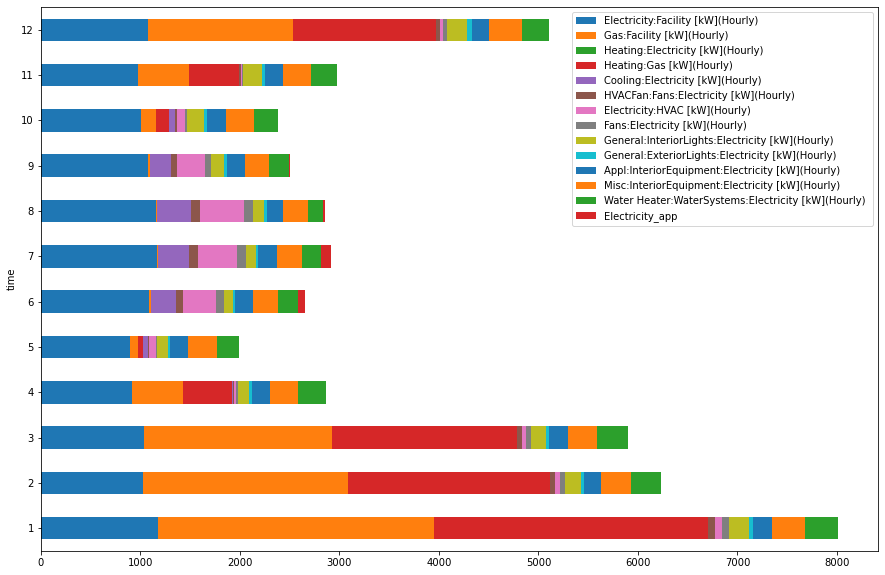

In [50]:
fig, ax = plt.subplots(figsize=(15,10))
merged.groupby(merged.index.month).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

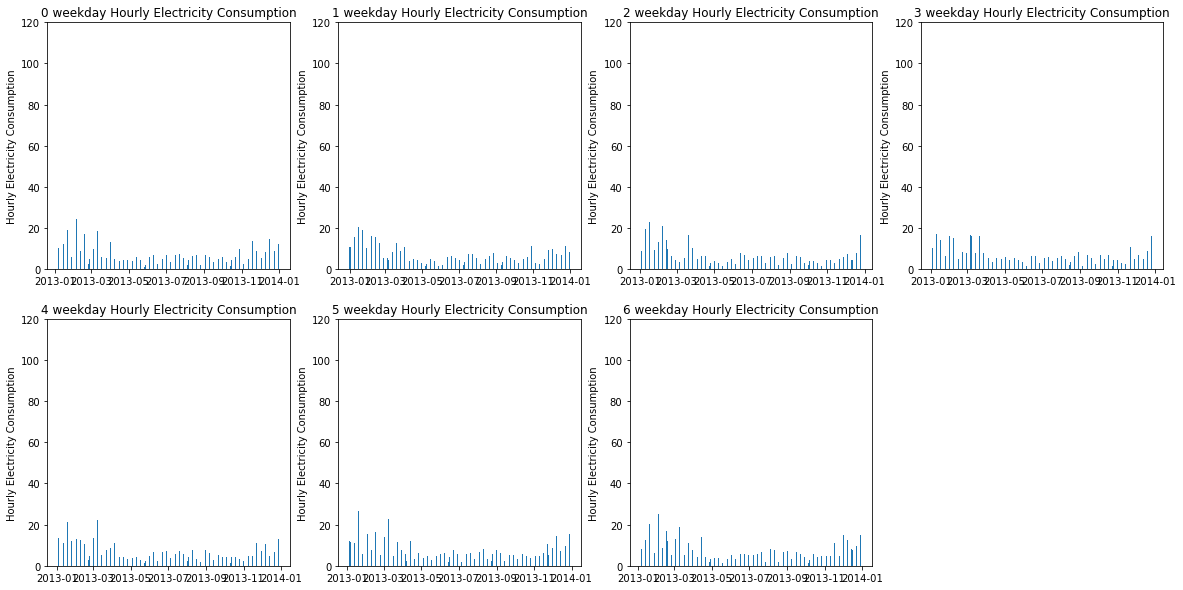

In [14]:
fig = plt.figure(figsize=(20,10))
for weekday in range(7):
    ax = fig.add_subplot(2,4,weekday+1)
    mask=merged.index.weekday==weekday
    ax.set(title="{} weekday Hourly Electricity Consumption".format(weekday),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(merged.loc[mask,"total_Electricity"].index,height=merged.loc[mask,"total_Electricity"],label="{}".format(weekday))

In [16]:
merged2=merged.copy()
merged2=merged2.groupby(merged2.index.weekday).sum()

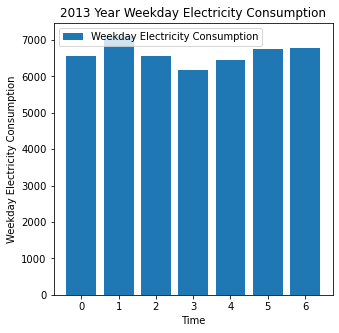

In [17]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(merged2.index,height=merged2.total_Electricity,label="Weekday Electricity Consumption")
ax.set(title="2013 Year Weekday Electricity Consumption",
xlabel="Time",
ylabel="Weekday Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:ylabel='time'>

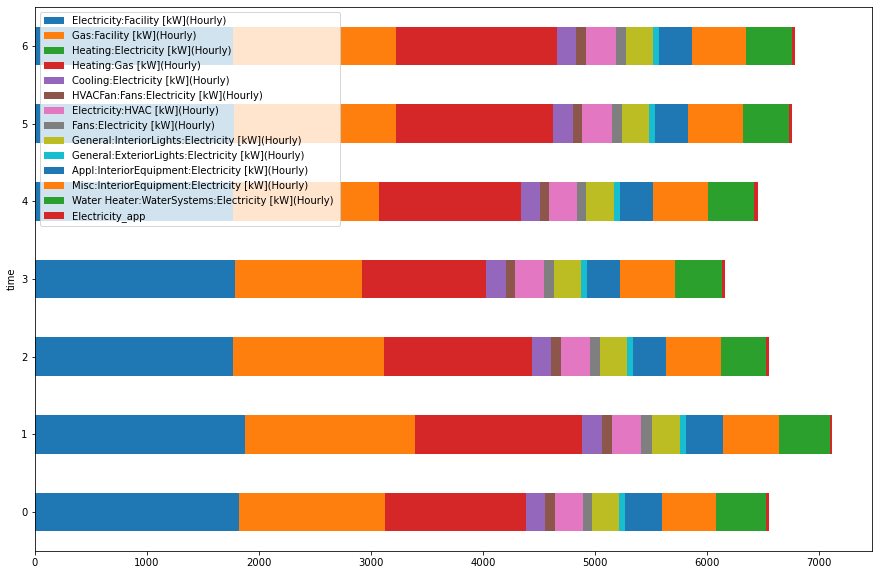

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
merged.groupby(merged.index.weekday).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

In [55]:
merged

,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Electricity [kW](Hourly),Electricity_app,total_Electricity
time,,,,,,,,,,,,,,,
2013-01-01 01:00:00,0.974334,4.452977,0.0,4.425010,0.0,0.112709,0.112709,0.112709,0.154019,0.033180,0.092943,0.406035,0.158803,NaN,11.035430
2013-01-01 02:00:00,0.796582,4.850317,0.0,4.824566,0.0,0.122617,0.122617,0.122617,0.089845,0.019355,0.076186,0.373851,0.098084,NaN,11.496637
2013-01-01 03:00:00,0.735028,5.037645,0.0,5.012193,0.0,0.127099,0.127099,0.127099,0.064175,0.013825,0.062326,0.369517,0.081442,NaN,11.757447
2013-01-01 04:00:00,0.727433,5.107562,0.0,5.082468,0.0,0.128391,0.128391,0.128391,0.064175,0.013825,0.053976,0.364315,0.086107,NaN,11.885034
2013-01-01 05:00:00,0.778706,5.270878,0.0,5.246732,0.0,0.132549,0.132549,0.132549,0.064175,0.013825,0.065823,0.350553,0.135137,NaN,12.323477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 20:00:00,2.601121,0.044507,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.743542,0.160179,0.349591,0.646167,0.684999,NaN,5.230105
2013-12-31 21:00:00,2.445630,0.046038,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.677155,0.145877,0.310730,0.668381,0.626843,NaN,4.920653
2013-12-31 22:00:00,2.206391,0.044963,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.570934,0.122994,0.293949,0.652777,0.549092,NaN,4.441100


In [56]:
mask=merged.index.hour==0
merged.loc[mask,"total_Electricity"]

time
2013-01-01    10.769827
2013-01-02     7.128140
2013-01-03    10.578406
2013-01-04    13.323836
2013-01-05    11.910000
                ...    
2013-12-27     9.501166
2013-12-28    10.888356
2013-12-29     8.329266
2013-12-30     5.181910
2013-12-31     3.926807
Name: total_Electricity, Length: 365, dtype: float64

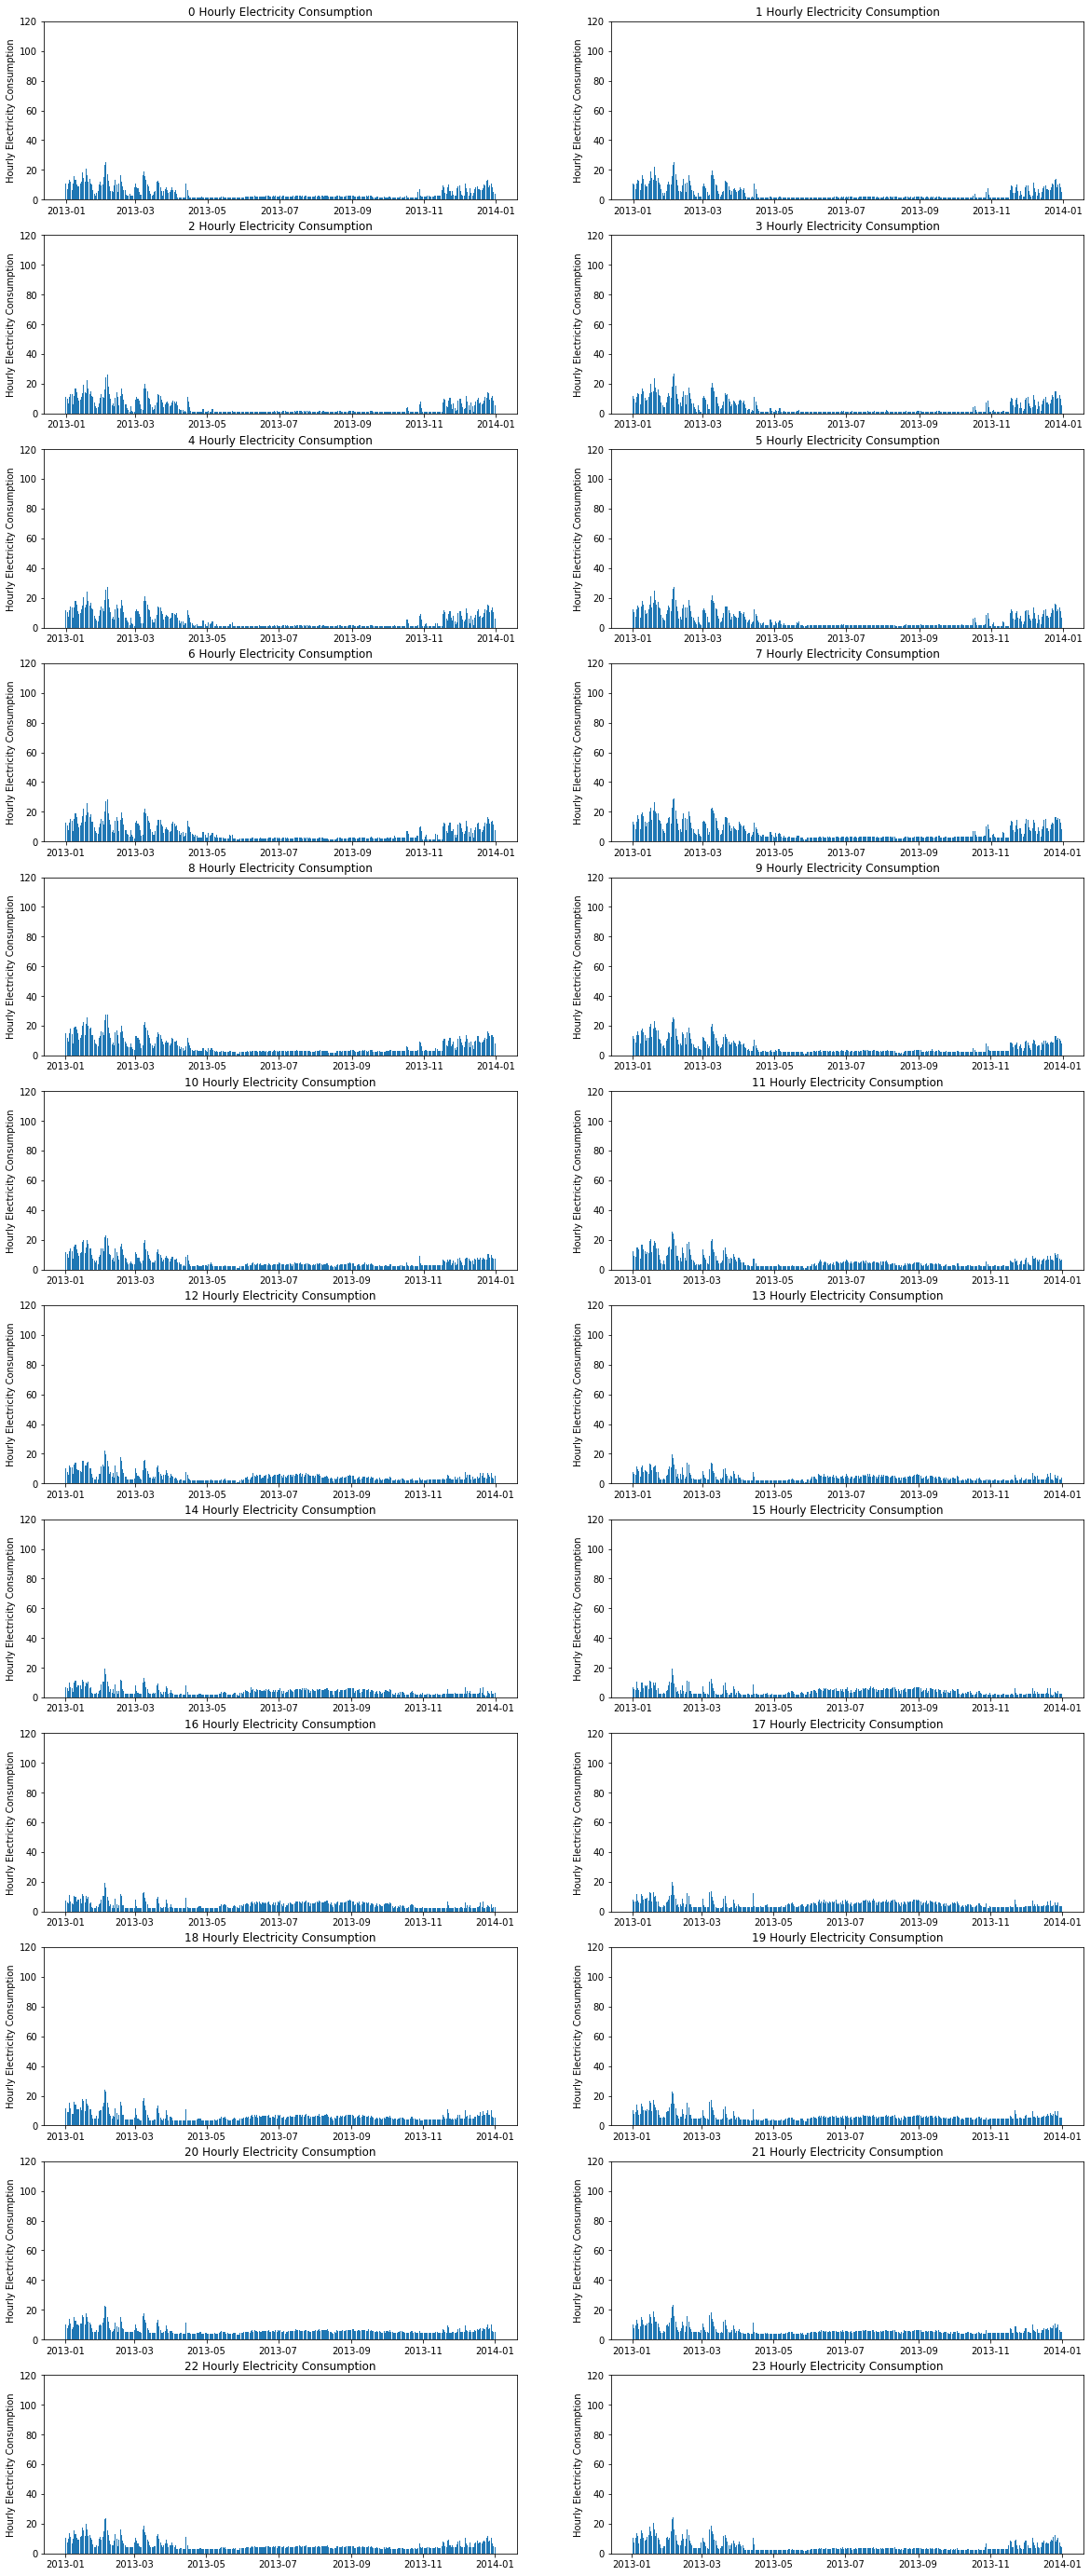

In [57]:
#df_pandas = merged
fig = plt.figure(figsize=(20,50))
for hour in range(24):
    ax = fig.add_subplot(12,2,hour+1)
    mask=merged.index.hour==hour
    ax.set(title="{} Hourly Electricity Consumption".format(hour),
        ylabel="Hourly Electricity Consumption")
    ax.set_ylim(0,120)
    ax.bar(merged.loc[mask,"total_Electricity"].index, height=merged.loc[mask,"total_Electricity"],label="{}".format(hour))


In [19]:
merged3=merged.copy()
merged3=merged3.groupby(merged3.index.hour).sum()

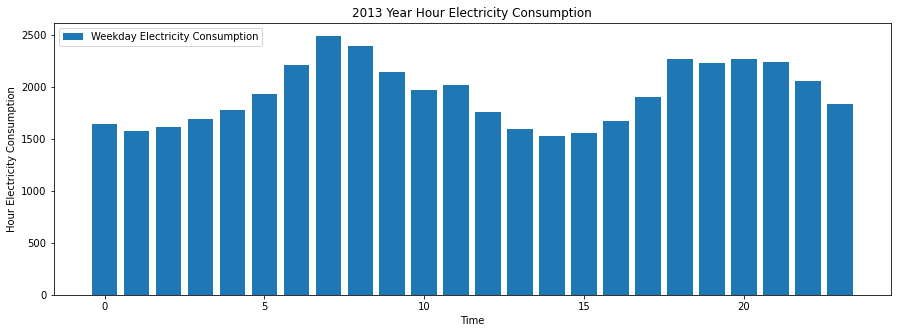

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(merged3.index,height=merged3.total_Electricity,label="Weekday Electricity Consumption")
ax.set(title="2013 Year Hour Electricity Consumption",
xlabel="Time",
ylabel="Hour Electricity Consumption")
plt.legend(loc="upper left")
plt.show()

<AxesSubplot:ylabel='time'>

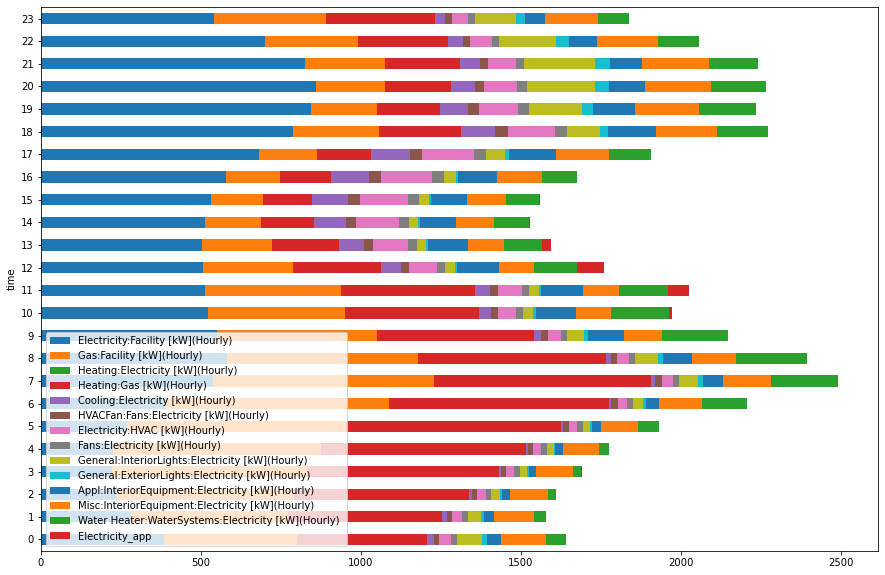

In [60]:
fig, ax = plt.subplots(figsize=(15,10))
merged.groupby(merged.index.hour).sum().iloc[:,:-1].plot.barh(ax=ax,stacked=True)

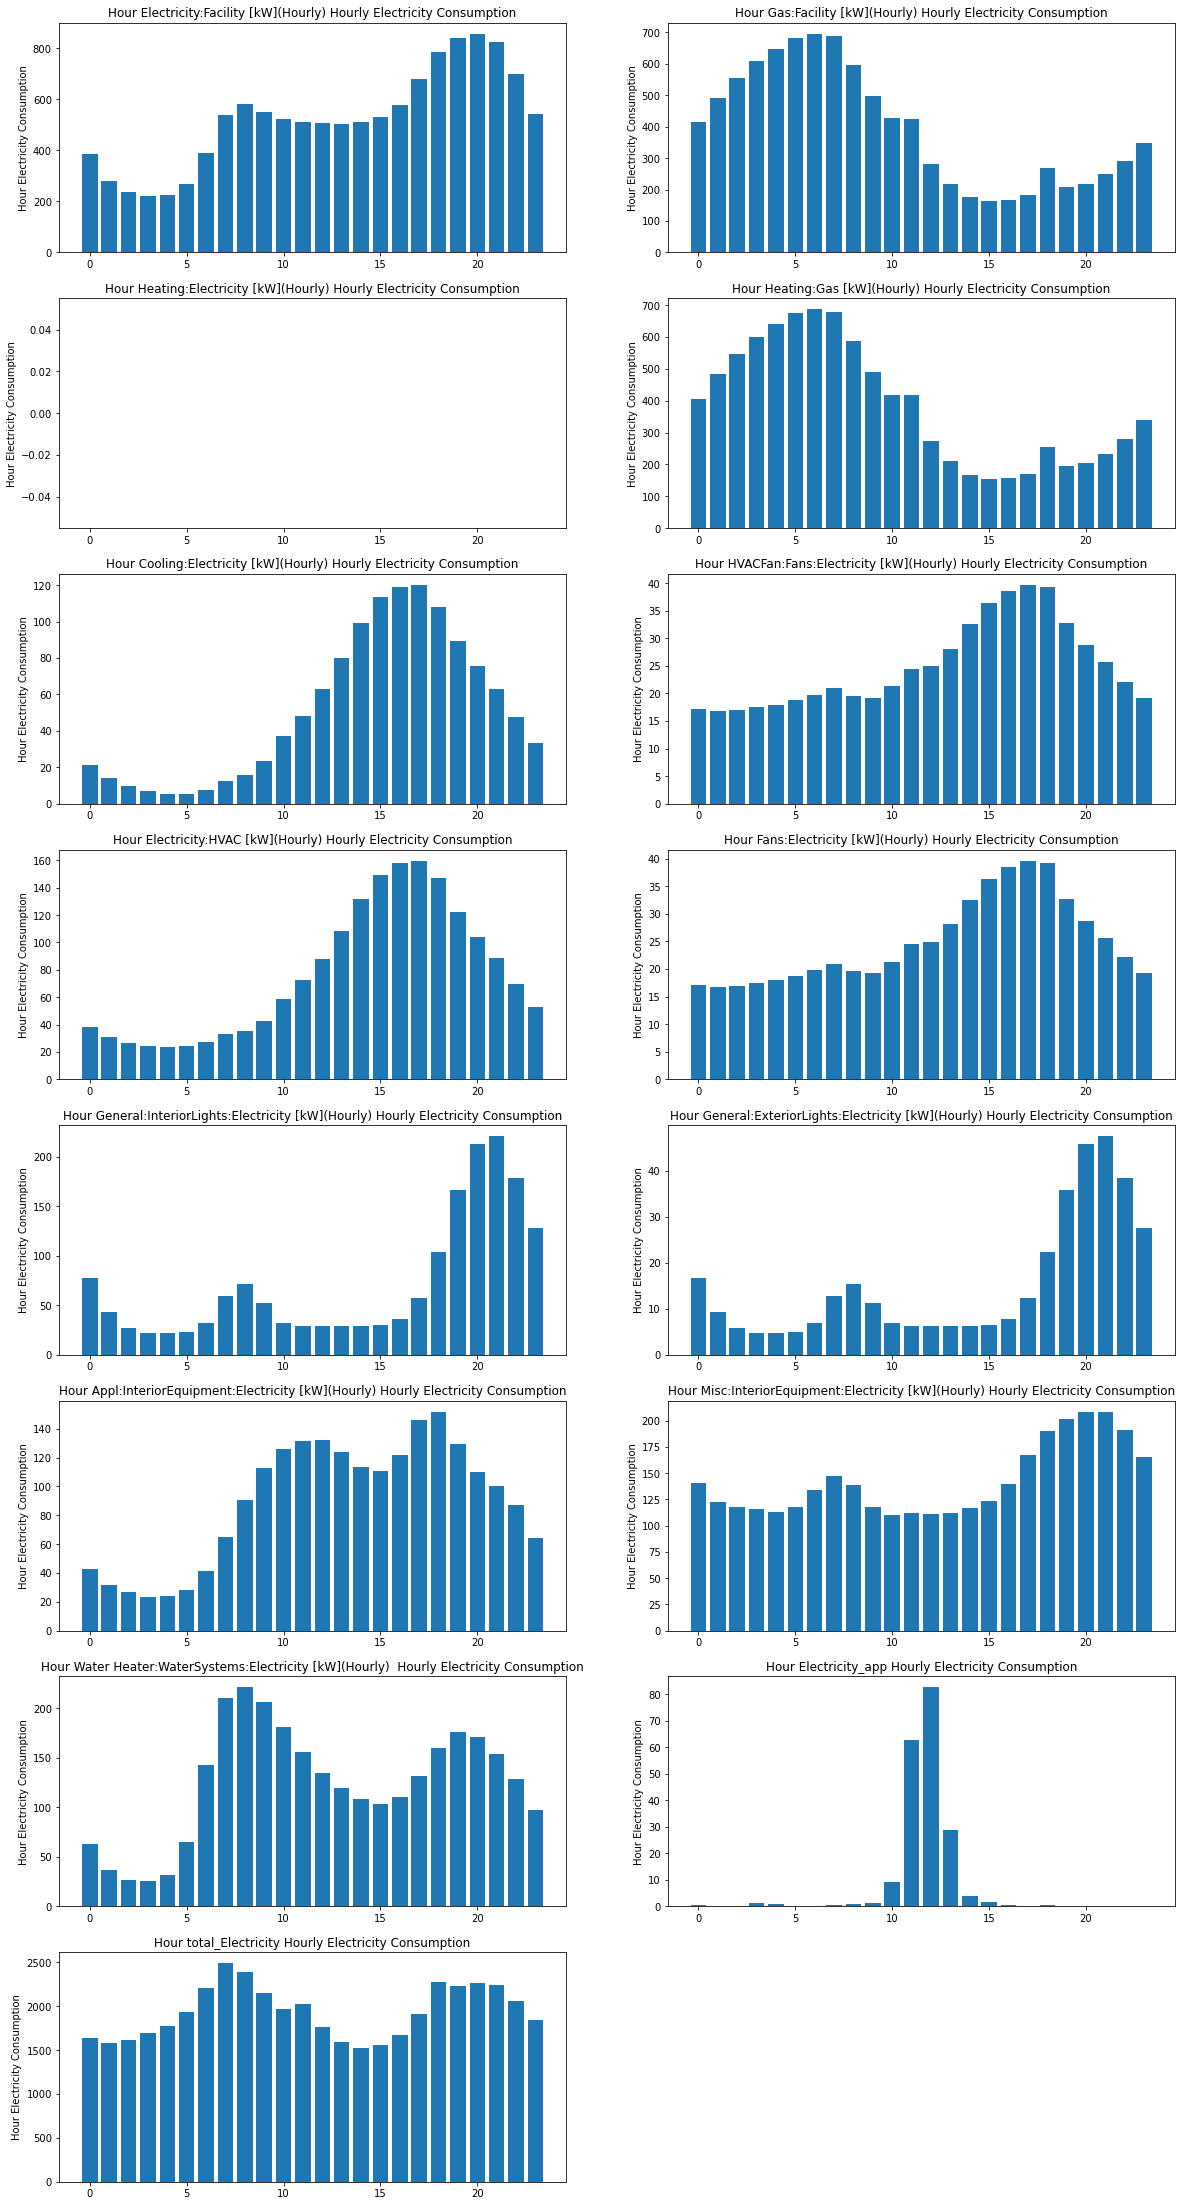

In [61]:
merged4=merged.copy()
merged4=merged4.groupby(merged4.index.hour).sum()
fig = plt.figure(figsize=(20,60))
for col in range(len(merged4.columns.to_list())):
    ax = fig.add_subplot(12,2,col+1)
    name=merged4.columns.to_list()[col]
    ax.set(title="Hour {} Hourly Electricity Consumption".format(name),
        ylabel="Hour Electricity Consumption")
    ax.bar(merged4.iloc[:,col].index,height=merged4.iloc[:,col],label="{}".format(name))